# Recommender system

### 1.0  movielens small som består av 100,000 ratings på 9000 filmer och 600 användare
- downloading the dataset

In [259]:
import pandas as pd

movies = 'Data1/ml-latest-small/ml-latest-small/movies.csv'
ratings = 'Data1/ml-latest-small/ml-latest-small/ratings.csv'

# fixa in genre också .... Kolla ratings (VAd är vektorn)

df_movies = pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32', 'title':'str'})

In [260]:
df_movies.head()

df_movies.describe()

df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [261]:
df_ratings = pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [262]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [263]:
# 9:20 
from scipy.sparse import csr_matrix 

movies_uesers=df_ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_uesers.values)

In [264]:
from sklearn.neighbors import NearestNeighbors
# Euclidean distance
# Manhattan distance
# Minowski distance
# cosine similarity

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [265]:
from fuzzywuzzy import process
# recommender function
def recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies['title'])[2]
    print('Movier selected:',df_movies['title'][idx],' Index', idx)
    print(' Searching for recommendations .....')
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations)
    #print(distances, indices )
    print(indices )
    for i in indices:
        print(df_movies['title'][i].where(i!=idx))

recommender('toy story', mat_movies_users, model_knn, 20)

Movier selected: Toy Story (1995)  Index 0
 Searching for recommendations .....
[[   0 2353  418  615  224  314  322  910  546  963  968 3189  506  123
   257  897  815 1182   31  277]]
0                                                     NaN
2353                                 'night Mother (1986)
418                                  Jurassic Park (1993)
615                  Independence Day (a.k.a. ID4) (1996)
224             Star Wars: Episode IV - A New Hope (1977)
314                                   Forrest Gump (1994)
322                                 Lion King, The (1994)
910     Once Upon a Time in the West (C'era una volta ...
546                            Mission: Impossible (1996)
963                                           Diva (1981)
968                           Arsenic and Old Lace (1944)
3189            Rififi (Du rififi chez les hommes) (1955)
506                                        Aladdin (1992)
123                                      Apollo 13 (1995)
25

## 1.1 - Movielens full - EDA


Läs in dataseten "movies.csv" och "ratings.csv"



In [267]:

movies = 'Data2/ml-latest/ml-latest/movies.csv'
ratings = 'Data2/ml-latest/ml-latest/ratings.csv'

df_movies = pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32', 'title':'str'} )
df_ratings = pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

# 86,000 movies by 330,975 users.

#df_movies.info()
df_ratings.describe()
df_ratings.head()




,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0


In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# räkna om så att antal röster per film 
df_test=df_ratings.loc[(df_ratings.groupby(['movieId'])['userId'].count())]


# ta bara hänsyn till de som har fler än 1000 omdömmen
df_test2=df_test[df_test.index>1000]


In [269]:
#df_testm=df_ratings.loc[(df_ratings.groupby(['movieId'])['userId'].count())]
df_testc=df_ratings.groupby(['movieId'])['userId'].count()
df_testavg=df_ratings.groupby(['movieId'])['rating'].mean()
#df_test2=df_test[df_test.index>1000]

df_abcd= pd.merge(df_testc,df_testavg, on='movieId', how='inner')

df_abcd.rename_axis('movieId').reset_index()
df2 = df_abcd.rename({'userId': 'Count'}, axis='columns')


In [270]:
df2.sort_values(by='Count', ascending=False)

,Count,rating
movieId,,
318,122296,4.416792
356,113581,4.068189
296,108756,4.191778
2571,107056,4.160631
593,101802,4.150287
...,...,...
230881,1,4.500000
230877,1,1.500000
230871,1,2.500000


a)  EDA

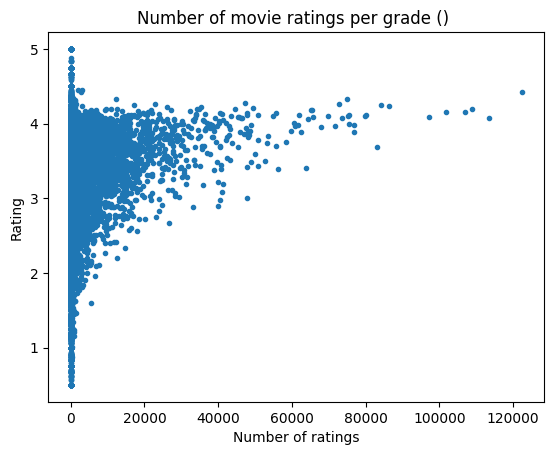

In [271]:
plt.plot(df2['Count'], df2['rating'], '.')
plt.title('Number of movie ratings per grade () ')
plt.xlabel('Number of ratings')
plt.ylabel('Rating')
plt.show()

C:\Users\Lund\AppData\Local\Temp\ipykernel_7412\2295245398.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  snsplot.set_xticklabels(tick_labels, rotation=45, ha='right')


Text(0.5, 1.0, 'Number of ratings for top rated 100 movies and their average rating')

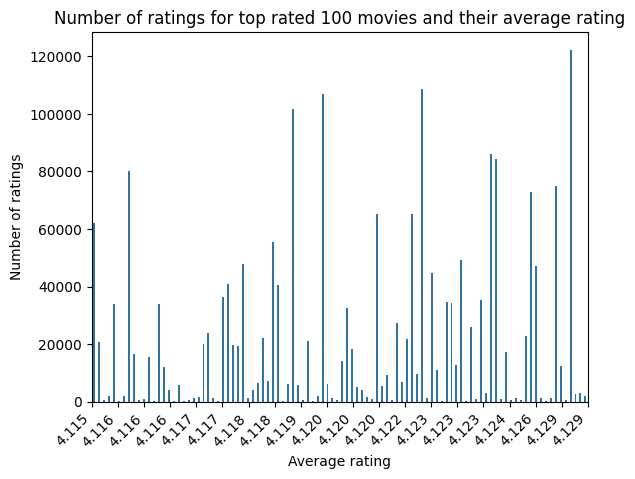

In [298]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

# En groupby för att räkna ut genomsnittligt betyg per film,
# slå samman denna med antalet ratings per film (de som har fler 
# än 1000)

df_test3=df_ratings.groupby(['movieId'])['rating'].mean()
df_A=df_test2.rename_axis('Count_ratings').reset_index()
df_B=df_test3.rename_axis('movieId').reset_index()
#df_all=pd.merge(df_A, df_B, on='movieId', how='inner').sort_values(by='rating_y',ascending = False)
df_all=df2[df2['Count']>100].sort_values(by='rating',ascending = False)

# Skapa en plot som visar antalet ratings mot genomsnittligt betyg 
# illustrarr att det inte finns ett samband mellan fler röster och 
# ett högt genomsnittligt betyg, OBS bara för de 200 med högst genomsnitligt betyg
snsplot=sns.barplot(data = df_all.head(100), x = "rating", y = "Count", width=0.4)
# with som help from Stack Overflow
tick_labels = [f'{float(label.get_text()):.3f}' for label in snsplot.get_xticklabels()]
snsplot.set_xticklabels(tick_labels, rotation=45, ha='right')
snsplot.xaxis.set_major_locator(ticker.LinearLocator(20))
snsplot.set_xlabel('Average rating')
snsplot.set_ylabel('Number of ratings')
snsplot.set_title('Number of ratings for top rated 100 movies and their average rating')


In [273]:
df_all.sort_values(by='Count', ascending= False)


,Count,rating
movieId,,
318,122296,4.416792
356,113581,4.068189
296,108756,4.191778
2571,107056,4.160631
593,101802,4.150287
...,...,...
95508,101,3.143564
48501,101,3.539604
133869,101,3.059406


In [274]:
#df_movies.sort_index()
#df_movies.reset_index().set_index('movieId')

In [287]:
df_movies['title'][356]

'It Could Happen to You (1994)'

In [316]:
top_10=df_all.sort_values(by='Count', ascending=False).head(10)
top_10s=top_10.rename_axis('movieId').reset_index()

namelist=[]

for i in list(top_10s['movieId']):
   namelist.append(df_movies[df_movies['movieId'] == i]['title'].values[0])



b)  Vilka är de 10 filmerna med flest ratings

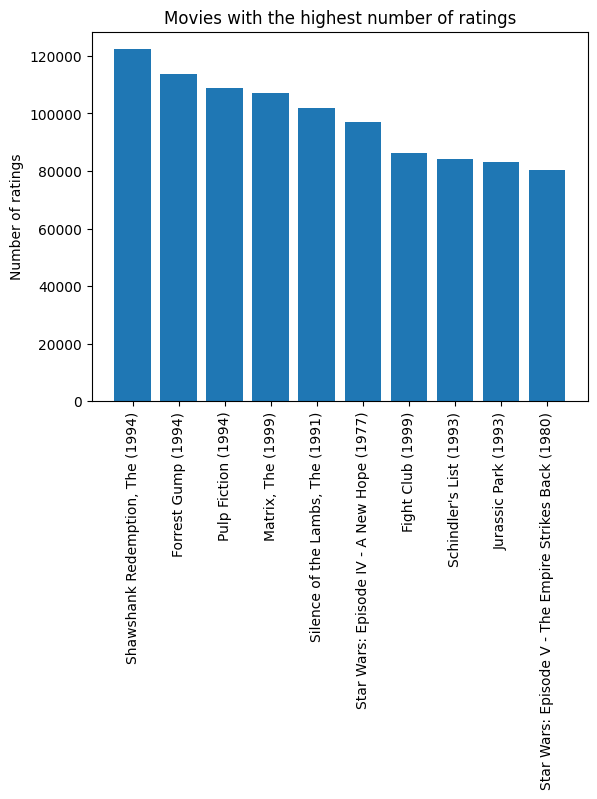

In [317]:
# df_test.sort_values(by='rating', ascending=False).head(10)

#top_10=df_test.rename_axis('Count_ratings').reset_index().sort_values(by='Count_ratings', ascending=False).head(10)
top_10=df_all.sort_values(by='Count', ascending=False).head(10)

top_10s=top_10.rename_axis('movieId').reset_index()

namelist=[]

for i in list(top_10s['movieId']):
   namelist.append(df_movies[df_movies['movieId'] == i]['title'].values[0])


plt.bar(x=namelist, height=list(top_10s['Count']))
plt.xticks(rotation=90)
plt.ylabel('Number of ratings')
plt.title('Movies with the highest number of ratings')
plt.show()

c)  Genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

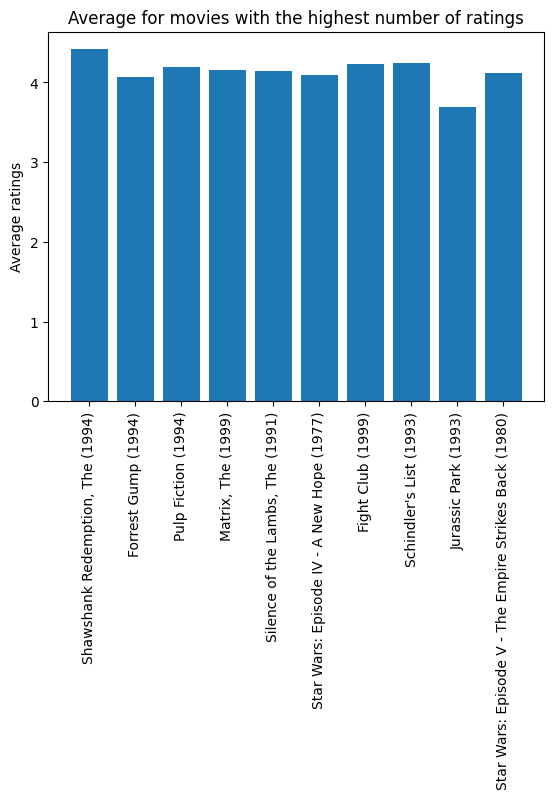

In [318]:
df_10avg=df_all.sort_values(by='Count', ascending=False).head(10)
plt.bar(x=namelist, height=list(df_10avg['rating']))
plt.xticks(rotation=90)
plt.ylabel('Average ratings')
plt.title('Average for movies with the highest number of ratings')
plt.show()

d)  Gör en plot över årtal och antalet filmer representerade i datasetet.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of movies'),
 Text(0.5, 1.0, 'Movies per Year')]

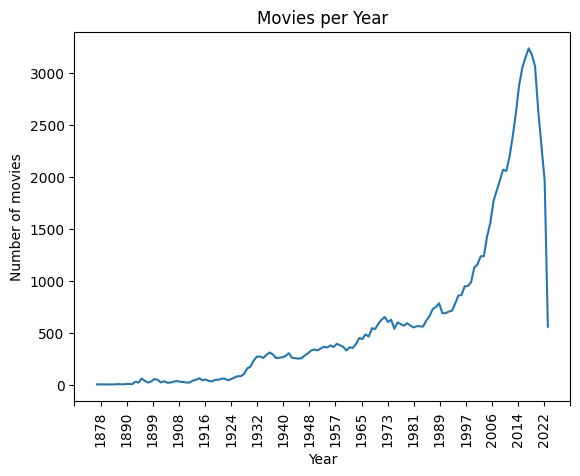

In [279]:
# df_year=pd.DataFrame()
# df_year[['year','Numb_movies']]=df_movies['title'].str.extract(r'\((\d{4})\)').value_counts()

df_tmp=pd.DataFrame(df_movies['title'].str.extract(r'\((\d{4})\)').value_counts())
df_years=df_tmp.rename_axis('years').reset_index().sort_values(by='years', ascending=True)

yearplot=sns.lineplot(df_years,x='years', y='count')
yearplot.tick_params(axis='x', rotation=90)
yearplot.xaxis.set_major_locator(ticker.LinearLocator(20))
yearplot.set(xlabel='Year', ylabel='Number of movies', title='Movies per Year')



f)  Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

In [280]:
# se uppgift 1.1c (c) ovan

### 1.2 Skapa gles matris

In [354]:
import numpy as np
from scipy import sparse
# mat_movies_ratings=csr_matrix(np.array(data_sparse.T))

csr = sparse.coo_matrix(df_ratings.T).tocsr()



In [351]:
csr

<3x33832162 sparse matrix of type '<class 'numpy.float64'>'
	with 101496486 stored elements in Compressed Sparse Row format>

In [355]:
df_ratings['rating'].count()

33832162

In [352]:
from sklearn.neighbors import NearestNeighbors
# Euclidean distance
# Manhattan distance
# Minowski distance
# cosine similarity

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(csr)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

### 1.3 Recommender system

In [375]:
from fuzzywuzzy import process
# recommender function
def recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies['title'])[2]
    print('Movier selected:',df_movies['title'][idx],' Index', idx)
    print(' Searching for recommendations .....')
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations)
    #print(distances, indices )
    for i in indices:
        print(df_movies[df_movies.index==i]['title'].values[0])


recommender('toy story', mat_movies_users, model_knn, 6)

Movier selected: Toy Story (1995)  Index 0
 Searching for recommendations .....
[   0 2353  418  615  224  314] Shawshank Redemption, The (1994)


In [374]:
df_movies[df_movies.index==314]['title'].values[0]

'Shawshank Redemption, The (1994)'

a) hur systemet fungerar
- baserat på data från ratings (betyg) från kunder för filmer
- Genom att använda en KNN (närmaste grannar) så för att hitta rekommendationer till en film så plockas dessa grannar genom att hitta de 5 grannar som ligger närmast.
-  rekommendation för en film skapas genom att mäta avståndet till alla filmer och plocka ut de som ligger närmast, avståndet mäts genom en cosinus funktion. Cosinus funktionen bygger på att jämföra vektorn för inputfilmen med databasesen vektorer. Vektorn bygger på tre featurers userId, movieId och rating (3D rum)
- det finns logiska fel i rekommendationerna. En av felen är att likheten (minsta avståndet) bygger på featurers (userId och movieId), dessa spelar inte så stor roll när proportionen mellan dem är ungefär den samma (userId=1 och movieid=2 med userId=10000 och movieId=20000 ). Men skulle proportionerna ändras så kommer det at påverka likheten, t.ex. userId=1, movieId=2 och userId=200, movieId=100

b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa.


In [284]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
